In [2]:
# Standard imports
# If any of these don't work, try doing `pip install _____`, or try looking up the error message.
import numpy as np
import pandas as pd
import json
import time
import os.path
from os import path
import math
import datetime
import unidecode
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import time

# Intro

In [3]:
temp = pd.read_csv('data/player_data_final.csv')
data = temp.set_index('name')

<a id='decision_trees'></a>
# Decision Trees

Decision trees rely on the idea of **splitting up your data points with linear decision boundaries into different sections**. In order words, it's asking a series of yes or no questions to make our decision/estimation on which class an input point falls under.

Here's a couple examples of what a decision trees look like:

<img src='pictures/XKCD.png' width=35%>

As we can see from the tree above, we are able to answer a yes or no question at every step, and depending on our answer, we either went one way or another through the three. They are very synonymous to flowcharts, but we'll go into more intricacies with decision trees later on. In practice, with decision tree models, they won't have cycles, but they'll have the same logic structure. Here's another example of a decision tree made by Rosa!

<img src='pictures/meme.png' width=40%>

Meme credit to $\text{Rosa Choe}^{\text{TM}}$.

Now that we've seen a couple examples of decision trees, we can see how they can be used to help us classify a given input data point with a series of question to determine which class the data point lies within.

**Question:** How might you go about making the different components of a decision tree?

The intuition behind making a good decision tree is optimizing our questions (or different steps in the decision tree) to be able *to split up the data into as different categories as possible*. For example in the iris case, we would like to find a split where we may separate the various irises as much as possible. Now the question that arises, what is a good method through which we can determine these different bounds to split upon? We introduce the idea of **entropy**, where we minimize the entropy, or randomness in each split section of the data.

<a id='entropy'></a>
## Entropy

To begin, let's first define what entropy is. In the context of machine learning, entropy is **the measure of disorder  within a set** or the **amount of surprise**.

A great visualization for different entropies is as follows:
<img src='pictures/Entropy.png' width='50%'>

Let's say $Pr(X = 1)$ is the probability that you flips a heads, where heads is represented by $1$ and tails is represented by $0$. From this, we can see that the y-value, $H(X)$ (or calculated entropy), is at a minimum when the chance of flipping a heads is $0$ or $1$, but is at a maximum when the chance of flipping a heads is $0.5$. In other words, the data subset is the most random when there is an equal probability of all classes, and minimized when there are probabilites of classes that are equal to $0$.

Mathematical equation for Entropy:

$$H(\textbf{p}) = -\sum_i p_i \cdot \log(p_i)$$

where $H(\textbf{p})$ is equal to the total entropy of the data set, and $p_i$ is equal to the probability of something occurring.

**Something to note:** When you calculate the entropy on a subset with data points that are all the same class, you run into a mathematical error, which is because $\log_{2}(0)$ cannot be calculated. So, as an alternative to calculating $\log_{2}(0)$, we can bring in the following limit instead:

$$\lim _{p\to 0+}p\log(p)=0$$

Now what does this mean in the context of decision trees? Well, let's take a look at a random scatter of different points that are classified blue and orange.

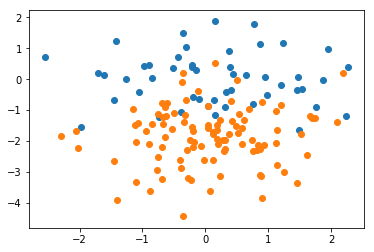

In [4]:
import numpy as np
import matplotlib.pyplot as plt

rng0 = np.random.RandomState(0)
rng1 = np.random.RandomState(1)

blueX = rng0.randn(50)
blueY = rng0.randn(50)
orangeX = rng1.randn(100)
orangeY = rng1.randn(100) - 2
plt.scatter(blueX, blueY);
plt.scatter(orangeX, orangeY);

In this example, we have $50$ blue points centered around `y=0` and $100$ orange points centered around `y=-2`.

From above, we can see that a good decision boundary to split our data might be at the line `y = -1`. But in order to back our visual findings with numerical proof, let's calculate the entropy of the set of data we have (which is basically just the entire data set as of now), and the entropy of each split data set weighted by the proportion of data points in each section. Now that might seem like a lot, but we'll break it down into different steps.

To begin, we've provided the following helper function to calculate entropy given a list of probabilities!

In [5]:
def entropy(probabilities):
    """
    Takes in probabilities as an array or list, and calculates the 
    Shannon's entropy of the set of data (defined above)
    """
    total = 0
    for prob in probabilities:
        total -= prob * np.log2(prob)
    return total

So, let's take a look at the entropy calculated from entire dataset itself.

In [6]:
# Input the probabilities of each class
# Hint: 2/3 of the points are orange, 1/3 of the points are blue
probabilities = ...

We can see that it's about $0.92$! But what does this metric mean? Well, to see its significance, let's take a look at the different entropies of the two data subsets we get after we split the data with the line `y = -1`.

Here's a plot of the data with a horizontal line drawn at `y = -1`!.

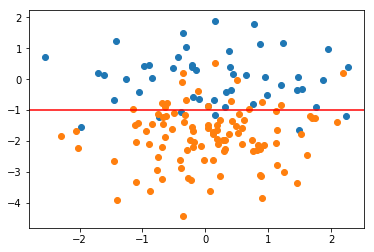

In [7]:
plt.scatter(blueX, blueY);
plt.scatter(orangeX, orangeY);
plt.axhline(y=-1, color='red');

Now, let's calculate the entropies of each of the two data subsets!

In [8]:
# Counting the number of orange and blue data points below the line y = -1.
orange_below_neg1= sum(orangeY < -1)
blue_below_neg1= sum(blueY < -1)

total_below = orange_below_neg1 + blue_below_neg1

# Calculating the entropy of the subset with data points with y-values less than -1.
bottom_entropy = entropy([orange_below_neg1 / total_below, blue_below_neg1 / total_below])

# Calculating the entropy of the subset with respective to its proportion size
bottom_entropy *= (total_below / 150) # 150 total data points
bottom_entropy

0.23735442860174844

Now, just from calculating the entropy in the subset of data points with y-values less than 1, and multiplying it by the proportion of data points in the lower subset, we see that it's already significantly lower than the entropy calculated from the entire dataset itself! However, we still need to calculate the entropy for the upper subset of data as well, and add those entropies up. Only if the summed entropies is less than the initial entropy level will we be able to conclude that this boundary we've created is useful.

DIY! Calculate the entropy of the subset of data points with y-values > -1 multiplied by the proportion of data points in that subset.

In [9]:
# Hint: Copy over what we did to calculate the bottom entropy, and change some things to get a value for the top entropy!
orange_above_neg1= sum(orangeY >= -1)
blue_above_neg1= sum(blueY >= -1)

top_entropy = ...

In [10]:
assert top_entropy == 0.33164370306772284

AssertionError: 

Now, let's calculate the total entropy of both subsets!

In [ ]:
total_entropy = bottom_entropy + top_entropy
total_entropy

Nice! From this process, we can clearly see that $0.57$ is less than $0.92$, so the decision boundary we introduced made the overall entropy of the data points lower! We've now got two subsets of the data that have lower entropy, meaning there is less disorder in terms of proportion between the two classes within each subset. We've officially made our first branch our decision tree!


Now, we're able to see from a numerical approach on which decision boundaries would be effective in terms of classifying our data, but we it is not obvious how we chose the line `y = -1`! From the above example, we derived the line `y = -1` from looking at the data, but sometimes it's not so clear to determine where decision boundaries should lie. In practice, we just try many decision boundaries and use the one that minimizes overall entropy.

<a id='back_to_decision_trees'></a>
## Back to Decision Trees

Now that we've seen how entropy can help us determine which decision boundaries are good for our decision tree, let's get to constructing a decision tree of our own!

In [13]:
!pip install graphviz

In [18]:
from sklearn import datasets

In [19]:
from sklearn.tree import DecisionTreeClassifier
from helpers import plot_tree
from helpers import plotPairwiseDecisionTrees

In [29]:
#importing the data
iris = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['Sepal Length', 'Sepal Width','Petal Length','Petal Width'] + ['species'])

#y contains the correct classifications (0, 1, 2 for each type of Iris)
Y = iris["species"]


In [30]:
feature_columns = ['Sepal Length', 'Sepal Width','Petal Length','Petal Width']
X = iris[feature_columns].values
Y = iris['species'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

#### Splitting the Data into Train and Test Sets

In [31]:
#Splitting dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [32]:
decision_tree = DecisionTreeClassifier('entropy')
decision_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Take a look at some of the different parameters that were printed! We have things ranging from `min_samples_leaf` to `max_features`; all different parameters that can construct our desired decision tree differently. Now, like any machine learning model, let's FIT it against some training data!

In [36]:
# Hint: Take a look a the documentation to see how we can fit our model against our iris using shift tab
# Hint: Keep in mind we have X_train and Y_train

decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Nice! Now that we've constructed a decision tree off of the Iris data set, let's see what it looks like!

In [37]:
# plot_tree('entropy', 'best', datasets.load_iris())
plot_tree(datasets.load_iris())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


interactive(children=(Text(value='entropy', description='crit'), Text(value='best', description='split'), Drop…

You might be able to tell that you can play around with the drop-down boxes and select which depth of tree you'd like to see, as well as input different kinds of datasets into the third argument of the `plot_tree` function. Try plugging in different kinds of data sets into the third argument of the function and see the different decision trees that pop up as a result! (Some data sets you can try out are `datasets.load_breast_cancer()` and `datasets.load_wine()`, but feel free to try other data sets that require classification!)

One thing that we want to highlight is that these decision trees stopped making decision boundaries (or branches) when the subsets were completely pure (entropy = 0)! That means that all the data points within that subset were all of the same class, and that we were able to classify every data point perfectly. Now, we can begin to classify future data points!

**Questions for understanding:**
> 1. Why don't we keep making deeper and deeper trees to get fully "pure" leaves?
> 2. How does bias and variance change with tree depth?

One thing we might notice with this strategy of splitting data points until they reach "pure" data subsets is that the decision trees will be liable to **overfitting**! Let's take a look at a great example:

<img src="pictures/DecisionTreeError.png" width="60%">
Image from http://www.cs.cornell.edu/courses/cs4780/2017sp/lectures/lecturenote17.html

**Question:** What are some methods to avoid overfitting (consider depth and number of samples in the leaves)?

Our solution to this problem of overfitting is limiting the number of splits your decision tree takes! By setting a certain quota for the number of splits your decision tree takes, we can ensure we don't end up with scenarios with the graph on the left, where we are too precisely creating decision boundaries.

Here's another good example!

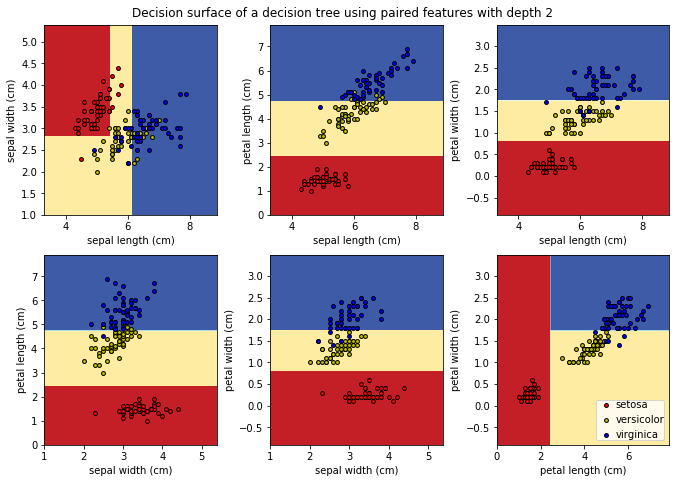

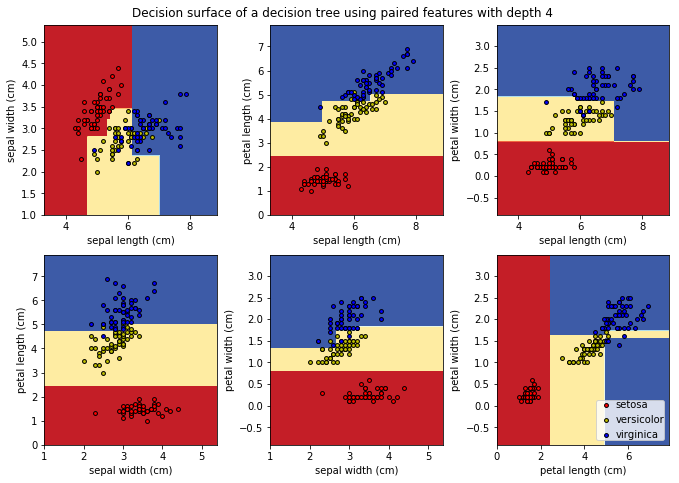

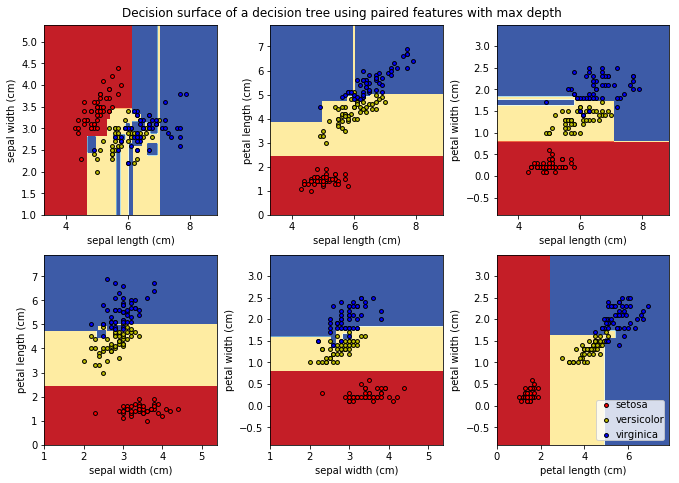

In [38]:
# From http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
# Max Depth 2
plotPairwiseDecisionTrees(2)
# Max Depth 4
plotPairwiseDecisionTrees(4)
# No Max Depth
plotPairwiseDecisionTrees()

**Questions for understanding:**
> 1. What do the colored points and regions represent?
> 2. What are some trends as the trees get deeper?
> 3. How do the decision boundaries change with depth?

As we can see, the deeper our tree goes, the higher the variance is within the tree, as the decision tree is tailored towards our training data, and could be completely different had we just added/removed a couple data points. However, it also has low bias, as it won't consistently classify certain data points incorrectly (it's too precise!)

Now, we'd love to have a decision tree that had both low bias and low variance, but it seems like it's a tradeoff for one or the other. So, it'd be ideal to get the best of both worlds, and get low bias and low variance. But how?

Idea: **What if we got more models trained on our dataset?**

This idea of training more models on our training set introduces the idea of **ensemble learning**, which we will go into further in the next section, and help us solve our dilemna of wanting both low bias and low variance!

# Sklearn Model